# **EDA (Exploratory Data Analysis)**

## **Project**
The marketing team of Tinder is experiencing a decrease in the number of matches, and they are trying to find a way to understand what makes people interested in each other.

They decided to conduct a speed dating experiment with individuals who had to provide Tinder with a lot of information about themselves, which could ultimately reflect on their dating profile on the app.

Tinder then collected the data from this experiment. Each row in the dataset represents one speed date between two people and indicates whether each of them secretly agreed to go on a second date with the other person.

## **Goals**
To understand the factors that spark mutual interest between individuals and lead them to agree on a second date, the study is structured into three key components:

1. **Initial explorations** of the data present in the dataset

2. **Analysis of the population** that participated in the study

3. **Analysis of the criteria** that lead to a match or not


In [1]:
#Library imports for project analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV Data File
df=pd.read_csv("Speed+Dating+Data.csv", encoding='unicode_escape')

### 1. **Initial Explorations of the Data in the Dataset**


In [3]:
print("Number of rows and columns: {}".format(df.shape))
print()

print("Displaying a sample of the dataset: ")
display(df.head())
print()

print("Basic Statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Missing values by category (in %):")
display(100*df.isnull().sum()/df.shape[0])

Number of rows and columns: (8378, 195)

Displaying a sample of the dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Basic Statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000



Missing values by category (in %):


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

### ➡️ Conclusions: Initial Explorations of the Data in the Dataset.
* The dataset is relatively large, primarily due to the extensive number of columns (195).
* The majority of the data is in numerical format.
* It's noticeable that some columns suffer from a significant lack of data. Therefore, these columns will need to be handled with caution in the subsequent stages of exploration.


### 2. **Analysis of the population** that participated in the study


a) Gender

In [4]:
# Number of null
print (f"Total of null values:  {df['gender'].isnull().sum()}")

# Change values in the "Gender" column for graphical representation (Male or Female).
df['gender'] = df['gender'].apply(lambda x: 
                            'Female' if x == 0 else
                             'Male' if x == 1 else "NAN")

# Values in the "Gender" column after modification
gender_values = df['gender'].value_counts()

print (gender_values)

Total of null values:  0
gender
Male      4194
Female    4184
Name: count, dtype: int64


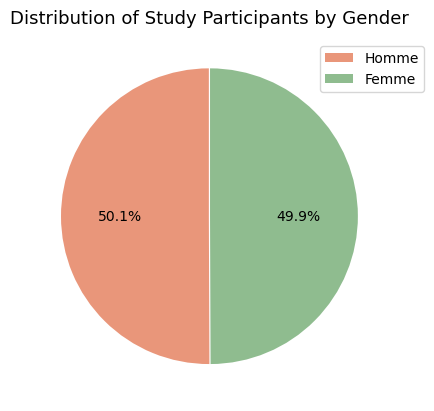

In [5]:
plt.figure()
plt.pie(gender_values,  
       autopct='%1.1f%%',
       shadow=False, 
       startangle=90,
       colors = ['darksalmon','darkseagreen'],
       explode=[0.004,0.004])

plt.title(label="Distribution of Study Participants by Gender", fontdict={"fontsize":13})
plt.legend(["Homme","Femme"],bbox_to_anchor=(1.1, 0.98))
plt.show()

Gender distribution is quite balanced, enabling a coherent analysis of the overall population.

b) Age

In [6]:
#  Null values and outliers. 

print (f"Total of null values: {df['age'].isnull().sum()}")

df['age'].describe()

Total of null values: 95


count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

Few null values compared to the entire dataset. We will simply ignore them. 
Furthermore, the values appear consistent (minimum age of 18 and maximum age of 55)

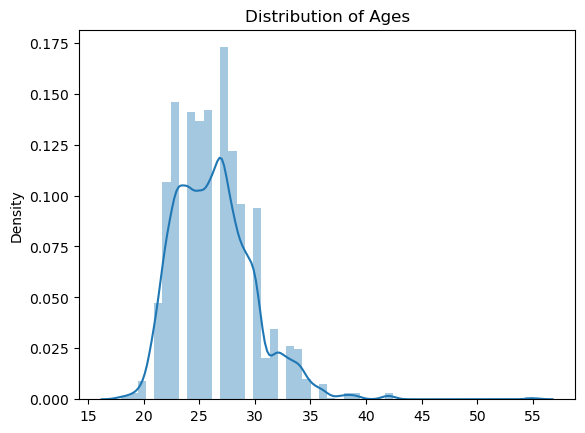

In [7]:
# Let's see the distribution of the age.
sns.distplot(df, x=df['age'], kde=True)
plt.title("Distribution of Ages")
plt.show()

* It can be seen that the majority of the sample consists in individuals between 20 and 35 years old.
* The distribution of ages appears to be consistent with the users of the application.

c) Sector of Activity

In [8]:
# Let's have a look on the data

print (f"Total of null values: {df['career_c'].isnull().sum()}")

df['career_c'].describe()
df['career_c'].value_counts()

Total of null values: 138


career_c
2.0     2320
7.0     2170
6.0      724
1.0      675
9.0      547
4.0      421
10.0     379
3.0      261
5.0      234
11.0     220
13.0      81
15.0      77
16.0      44
8.0       39
12.0      28
14.0      10
17.0      10
Name: count, dtype: int64

In [9]:
# Replacing values in the 'career_c' column to have the actual career fields as values
df['career_c'] = df['career_c'].apply(lambda x: 
                                'Lawyer' if x == 1 else
                                'Academic/Research' if x == 2 else
                                'Psychologist' if x == 3 else
                                'Doctor/Medicine' if x == 4 else
                                'Engineer' if x == 5 else
                                'Creative Arts/Entertainment' if x == 6 else
                                'Banking/Consulting/...' if x == 7 else
                                'Real Estate' if x == 8 else
                                'International/Humanitarian Affairs' if x == 9 else
                                'Undecided' if x == 10 else
                                'Social Work' if x == 11 else
                                'Speech Pathology' if x == 12 else
                                'Politics' if x == 13 else
                                'Pro sports/Athletics' if x == 14 else
                                'Other' if x == 15 else
                                'Journalism' if x == 16 else
                                'Architecture' if x == 17 else
                                "Non Disclosed")

gender_and_sex = pd.merge(df['gender'], df['career_c'],right_index = True,
               left_index = True)
gender_and_sex = pd.merge(gender_and_sex, df['match'],right_index = True,
               left_index = True)
gender_and_sex

,gender,career_c,match
0,Female,Non Disclosed,0
1,Female,Non Disclosed,0
2,Female,Non Disclosed,1
3,Female,Non Disclosed,1
4,Female,Non Disclosed,1
...,...,...,...
8373,Male,Other,0
8374,Male,Other,0
8375,Male,Other,0
8376,Male,Other,0


In [10]:
# Graphical Representation of the Distribution by Career. Gender was included to obtain a breakdown by male/female.

mask = gender_and_sex["career_c"] != "Non Disclosed" # Remove rows without industry sector.   
gender_and_sex = gender_and_sex[mask]

fig = px.bar(gender_and_sex, x=gender_and_sex["career_c"], 
             color=gender_and_sex["gender"],
             color_discrete_sequence=['darkseagreen','darksalmon'])


fig.update_xaxes(categoryorder = "total descending")
fig.update_layout(title_text="Distribution of Careers by Gender")
fig.update_traces(dict(marker_line_width=0))
fig.show()

* Two major categories can be distinguished: 'Academic/Research' and 'Banking/Consulting/...'.
* These are relatively broad industry sectors that can encompass a large number of individuals. It would be pertinent to see if this sample represents the tinder's users.

d) Match

In [11]:
print (f"Total of null values: {df['match'].isnull().sum()}")

# Changing the values to Yes and No

match = df['match'].apply(lambda x: 
                            'NO' if x == 0 else
                             'YES' if x == 1 else "NAN")

match_values = match.value_counts()

print (match_values)

# Visualisation

fig = px.pie(match_values,values = match_values, 
             names=match_values.index, 
             title='Match or not ?',
             color_discrete_sequence=['moccasin',"firebrick"], 
             height=500, width=500)
fig.show()


Total of null values: 0
match
NO     6998
YES    1380
Name: count, dtype: int64


### ➡️ Conclusion: Analysis of the population that participated in the study
* We have a fairly evenly distributed population between male and female and also an age group that is quite consistent with the application's users.
* We can distinguish two main industry sectors being predominantly represented.
* The match proportion is 16.5%.

### 3. **Analysis of the criteria** that lead to a match or not

In [12]:
#let's focus on the age and the impact on the match

mask = (df['gender'] == "Male") & (df['match'] == 1)
df_match_age = df[mask]

df_match_age["age_dif"]= df_match_age["age"]-df_match_age["age_o"]

print(f"Average age difference : {round(df_match_age['age_dif'].mean(),2)} years")

print("In this study, the participants are globally more interested in people of the same age. We can notive that men prefer women who are a bit younger.")


Average age difference : 0.53 years
In this study, the participants are globally more interested in people of the same age. We can notive that men prefer women who are a bit younger.


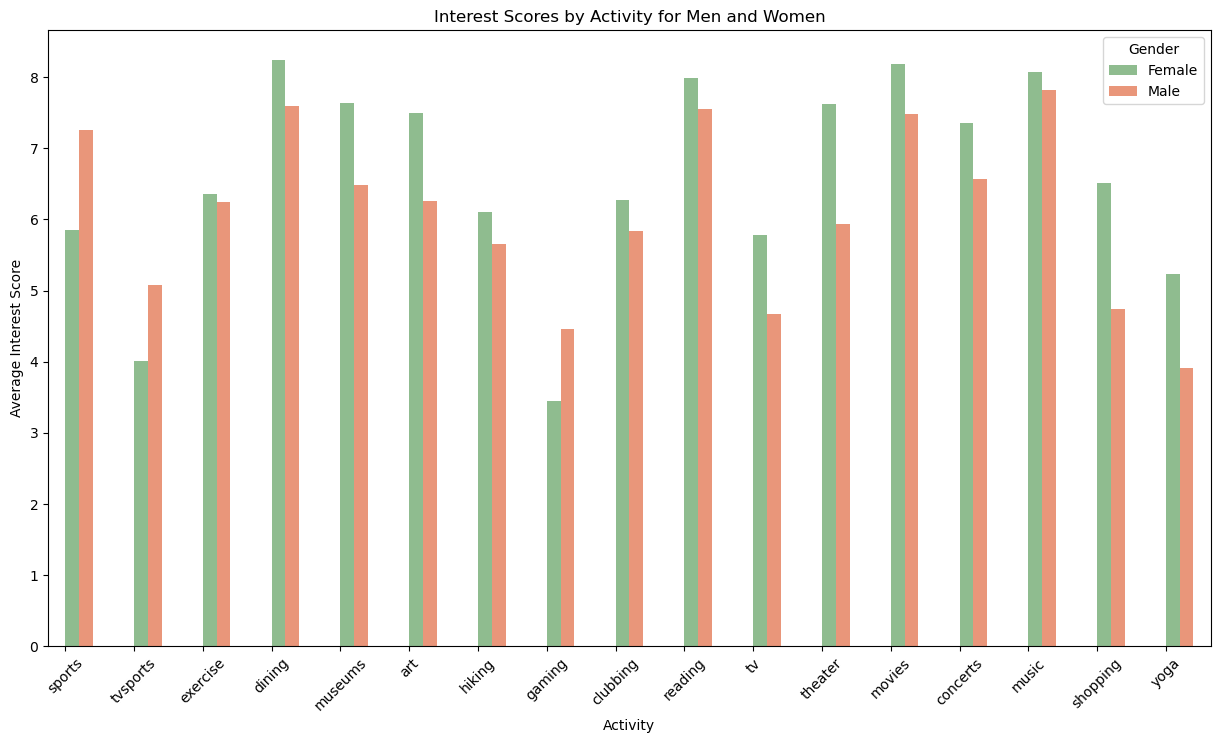

In [13]:
mask = df['match'] == 1

df_interest = df[mask]

interest_columns = ['sports', 
                    'tvsports', 
                    'exercise', 
                    'dining', 
                    'museums', 
                    'art', 
                    'hiking', 
                    'gaming', 
                    'clubbing', 
                    'reading', 
                    'tv', 
                    'theater', 
                    'movies', 
                    'concerts', 
                    'music', 
                    'shopping', 
                    'yoga']

df_interest = df_interest.dropna(subset=interest_columns)

df_interest = df_interest.groupby('gender')[interest_columns].mean()

# Transpose the DataFrame for plotting
df_interest_transposed = df_interest.T

# Plot histograms
fig, ax = plt.subplots(figsize=(15, 8))

# Bar plot for men and women for each activity
df_interest_transposed.plot(kind='bar', ax=ax, width=0.4, position=0, color=['darkseagreen','darksalmon'], rot=45)

ax.set_xlabel('Activity')
ax.set_ylabel('Average Interest Score')
ax.set_title('Interest Scores by Activity for Men and Women')

plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


In [14]:
df_interest

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
gender,,,,,,,,,,,,,,,,,
Female,5.847059,4.011765,6.355882,8.247059,7.636765,7.498529,6.104412,3.454412,6.275000,7.991176,5.779412,7.622059,8.180882,7.350000,8.070588,6.505882,5.226471
Male,7.254015,5.078832,6.239416,7.591241,6.477372,6.256934,5.651095,4.464234,5.843796,7.550365,4.667153,5.937226,7.484672,6.566423,7.818978,4.747445,3.905109


- **Men's Preferences:**
  - Men tend to match with women who express interest in activities such as dining, movies, and music.

- **Women's Preferences:**
  - Women, on the other hand, tend to match with men who are interested in activities such as music, dining, and reading.



In [15]:
print(f"distribution of etnic backgrounds {df['race'].value_counts()}")

print(f"Average importance of same racial/ethnic background {round(df['imprace'].mean())}/10")

# match comparison based on whether the two people are of the same race
df['match'] = df['match'].apply(lambda x: 
                            'NO' if x == 0 else
                             'YES' if x == 1 else "NAN")

mask = df["samerace"]== 1
df_samerace = df[mask]
match_samerace = df_samerace["match"].value_counts()

fig_samerace= px.pie(match_samerace, values = match_samerace ,names=match_samerace.index ,
             title='Match or not if same race ?', 
             height=500, width=500)

mask2 = df["samerace"]== 0
df_not_samerace = df[mask2]
match_not_samerace = df_not_samerace["match"].value_counts()

fig_not_samerace = px.pie(match_not_samerace, values=match_not_samerace, names=match_not_samerace.index,
                          title='Match or not if not same race?',
                          height=500, width=500)

fig = make_subplots(rows=1, cols=2, subplot_titles=['Match or not if same race?', 'Match or not if not same race?'],
                    specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add pie charts to subplots
fig.add_trace(fig_samerace['data'][0], row=1, col=1)
fig.add_trace(fig_not_samerace['data'][0], row=1, col=2)

# Update layout
fig.update_layout(height=500, width=1000)

# Show the figure
fig.show()


distribution of etnic backgrounds race
2.0    4727
4.0    1982
3.0     664
6.0     522
1.0     420
Name: count, dtype: int64
Average importance of same racial/ethnic background 4/10


* The average of importance to have the same racial/ethnic background is 4/10. 
* However, there is a slightly higher percentage of matches observed when individuals are of the same race (17%) compared to when they are not of the same race (16%)

In [16]:
# Focus on waves with rating type "100". 
mask=(df["wave"].between(1,4)) | (df["wave"].between(10,11)) | (df["wave"].between(15,17))
df2=df[mask]
df2.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Female,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Female,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [17]:
# Check for outliers. Sum of theses columns has to be = 100. 
df2["sum1_1"]=df2["attr1_1"]+ df2["sinc1_1"]+ df2["intel1_1"]+ df2["fun1_1"]+ df2["amb1_1"]+ df2["shar1_1"]
df2["sum1_s"]=df2["attr1_s"]+ df2["sinc1_s"]+ df2["intel1_s"]+ df2["fun1_s"]+ df2["amb1_s"]+ df2["shar1_s"]
df2["sum1_2"]=df2["attr1_2"]+ df2["sinc1_2"]+ df2["intel1_2"]+ df2["fun1_2"]+ df2["amb1_2"]+ df2["shar1_2"]
df2["sum1_3"]=df2["attr1_3"]+ df2["sinc1_3"]+ df2["intel1_3"]+ df2["fun1_3"]+ df2["amb1_3"]+ df2["shar1_3"]

In [18]:
#Keep only sum = 100
mask2 = (df2["sum1_1"]==100) & (df2["sum1_s"]==100) & (df2["sum1_2"]==100) & (df2["sum1_3"]==100) 
df3=df2[mask2]

In [19]:
#split the main DataFrame into smaller DataFrames that include the notation of attributes over the time 

df_b4= df3[["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]]
df_mid = df3[["attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]]
df_just_after = df3[[ "attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"]]
df_after= df3[["attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"]]

In [20]:
# Concatenate all the DataFrames
df_concat = pd.concat([df_b4, df_mid, df_just_after, df_after])

# Add a column "period" to identify the period of each dataset
df_concat['periode'] = ['1_before']*len(df_b4) + ['2_mid']*len(df_mid) + ['3_just_after']*len(df_just_after) + ['4_after']*len(df_after)

# Rearrange the columns to have "attr" as a separate column
df_concat = pd.melt(df_concat, id_vars=['periode'], var_name='attr', value_name='value')

df_avg = df_concat.groupby(['attr', 'periode']).mean().reset_index()

df_avg ['attr'] = df_avg['attr'].apply(lambda x: x.split('_')[0])

fig = px.bar(df_avg, x='attr', y='value', color='periode', barmode='group',
             labels={'value': 'Average values', 'periode': 'Period'},
             title='Average values for each attr by period')

fig.update_xaxes(categoryorder = "total descending")
fig.update_traces(dict(marker_line_width=0))
fig.show()


* Physical attraction is and remains the number one criterion for what is sought in the opposite sex during the rating phases. It is even noticeable that this criterion strengthens after the initial meetings.
* Intelligence is important and remains rather stable throughout the ratings.
* Sincerity and fun are rather overrated during the first ratings and tend to decrease as the ratings progress.
* Ambition is the least important criterion for this campaign.


## **Conclusion:**

In summary, participants in this study demonstrate a preference for individuals of similar age with a common cultural background. Notably:
* Men tend to match with women who express interest in activities such as dining, movies, and music.
* Women, on the other hand, tend to match with men who are interested in activities such as music, dining, and reading.

These insights highlight some key matching preferences observed in the dataset, providing valuable information about the interests that contribute to successful matches. It's noteworthy that physical attractiveness remains one of the most important criteria for individuals in this study. This characteristic aligns with the well-established nature of dating applications, including Tinder, which primarily relies on matching based on photos.
